## 1. Estudio del dataset (C)

La idea de este apartado es encapsular todo lo relacionado con el estudio del dataset. Pretendemos entender los datos con los que trabajamos de una manera tanto numérica como gráfica. También tenemos la intención de sacar conclusiones e ideas que nos guíen en los siguientes apartados.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Primeramente realizamos los imports que nos serán necesarios durante el estudio del dataset y además ajustamos algunas de las opciones tanto de panas, de matplotlib, como del notebook para que la visualización de los datos sea más cómoda.

In [2]:
originalDF = pd.read_csv('./Database/Concrete_Data_Yeh.csv', header=0, delimiter=',')

Cragamos el dataset en un dataframe de pandas usando la función para leer archivos .csv y nombramos la variable como "originalDF" ya que como realizaremos modificaciones sobre los datos nos interesa simepre tener disponible el original para poder usar esos datos sin modificar si fuera encesario.

In [3]:
originalDF.head()
originalDF.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280
1026,322.200,0.000,115.600,196.000,10.400,817.900,813.400,28,31.180
1027,148.500,139.400,108.600,192.700,6.100,892.400,780.000,28,23.700
1028,159.100,186.700,0.000,175.600,11.300,989.600,788.900,28,32.770
1029,260.900,100.500,78.300,200.600,8.600,864.500,761.500,28,32.400


Mostraos tanto los primeros 5 registros como los 5 últimos disponibles en nuestro dataset. De esta manera también vemos que disponemos de 1030 registros y un total de 9 variables.  
En la página de Kaggle del dataset (https://www.kaggle.com/maajdl/yeh-concret-data) ya está indicado, pero es evidente que nuestra variable objetivo será "csMPa". Esto hace referéncia a la fuerza compresiva del hormigón y, por tanto, es la variables más iteresante de intentar predecir.  
En la página de Kaggle se nos indica que absolutamente todos los valores, exceptuando "age" y "csMPa", usan las unidades kg/m3. En cuanto a "age" se encuentra en días (de 1 a 365) y en el caso de "csMPa", como es de suponer, se encuentra en megapascales (MPa).

In [4]:
originalDF.describe()
originalDF.isnull().sum()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

Usando el método "describe" de pandas obtenemos rápidamente una descripción estadística de cada una de las variables que forman nuestro dataset. También podemos ver que ninguna de las variables tiene valores nulos, lo cuál nunca está de más.  
Sin embargo, observamos también que los datos siguen escalas distintas, por lo tanto, sería conveniente que los normalizaramos o estandarizaramos los datos antes de seguir adelante. Por lo que hemos podido leer en distintos lugares (https://stackoverflow.com/a/54573558, https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc), la estandarización suele ser normalmente más beneficiosa que la normalización así que optaremos por ella.

In [5]:
standardScaler = preprocessing.StandardScaler()
stdDF = pd.DataFrame(standardScaler.fit_transform(originalDF))
stdDF.columns = originalDF.columns
stdDF.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.715,-0.857,-0.847,-2.800,-1.039,-2.212,-2.241,-0.707,-2.006
25%,-0.850,-0.857,-0.847,-0.781,-1.039,-0.527,-0.532,-0.612,-0.725
50%,-0.079,-0.602,-0.847,0.161,0.033,-0.063,0.074,-0.280,-0.082
75%,0.659,0.801,1.002,0.489,0.669,0.727,0.629,0.164,0.618
max,2.478,3.311,2.281,3.066,4.354,2.214,2.733,5.058,2.802


Una vez tenemos el dataset estandarizado sigamos explorando. El siguiente paso que vamos a dar va a ser el de visualizar tanto las correlaciones entre cada variable (incluída 'scMPa', la variable objetivo) así como ver de que manera se distribuyen los puntos de cada variable de entrada respecto a la objetivo.  Para ello nos ayudaremos de los dos siguientes gráficos:

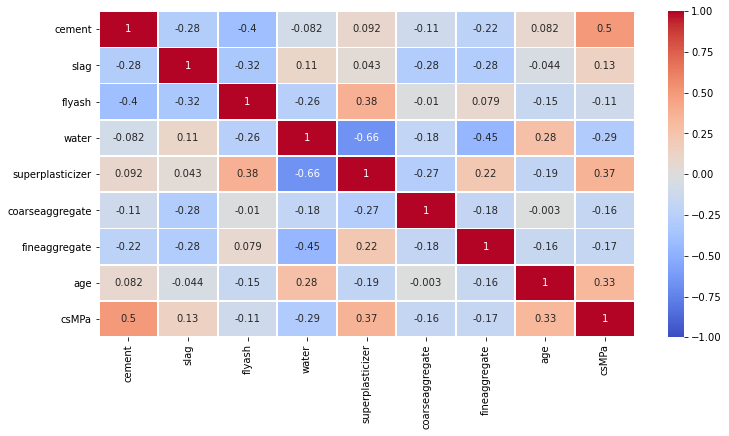

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(stdDF.corr(), annot=True, linewidths= .75, vmin=-1, vmax=1, cmap='coolwarm')
plt.show();

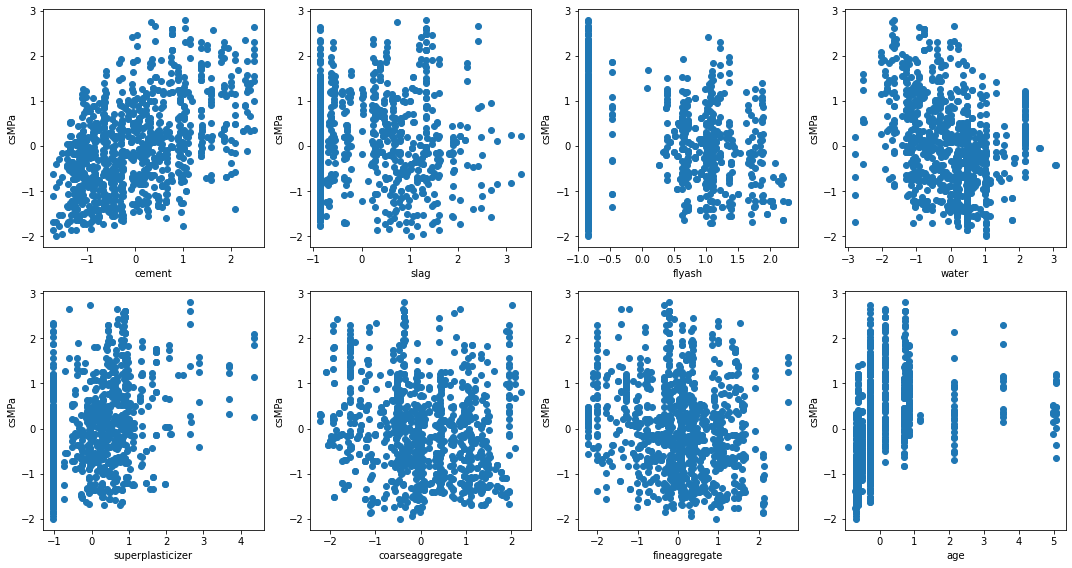

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(15,8))

varIdx = 0
for x in range(2):
    for y in range(4):
        axs[x,y].set(xlabel=stdDF.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(stdDF[stdDF.columns[varIdx]], stdDF['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show();

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Distribución datos base')

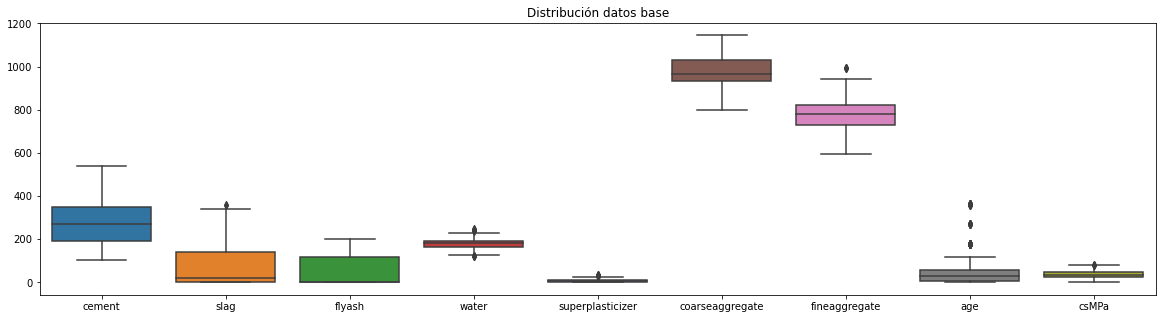

In [8]:
plt.figure(figsize=(20,5))
plt.title("Distribución datos base")
ax = sns.boxplot(data=originalDF,order=["cement","slag","flyash","water","superplasticizer","coarseaggregate","fineaggregate","age","csMPa"])
plt.show()

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Distribución datos normalizados')

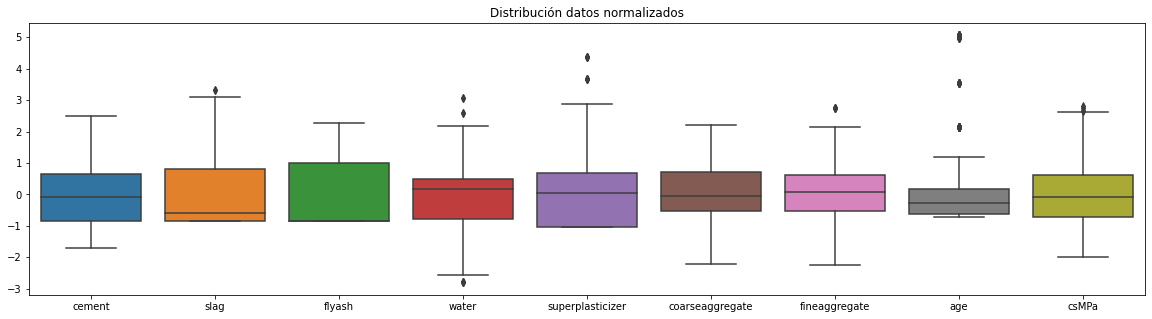

In [9]:
plt.figure(figsize=(20,5))
plt.title("Distribución datos normalizados")
ax = sns.boxplot(data=stdDF,order=["cement","slag","flyash","water","superplasticizer","coarseaggregate","fineaggregate","age","csMPa"])
plt.show()

De el primer gráfico podemos obtener información muy valiosa para nuestra regresión lineal, ya que nos indica que variables tienen una mayor correlación con la variable de salida. Estas son 'cement' con un 0.5, 'superlasticizer' con un 0.37, 'age' con un 0.33 y 'water' con una correlación negativa de 0.29.  
Sin embargo también vemos algunas correlaciones fuertes entre otras variables como 'water' y 'superplasticizer' que llegan a -0.66, u otras. Por lo tanto, los resultados obtenidos en ésta gráfica son orientativos pero no nos deben frenar de probar cosas con las demás variables más adelante.  
  
  
En cuanto a la segunda gráfica podemos observar, sobretodo, que algunas de nuestras variables tienen problemas. Vemos como 'slag', 'flyash',  y 'superplasticizer' acumulan muchos valores de 'csMPa' distintos al principio de las gráficas. Sin duda es algo a tener en cuenta y seguidamente lo estudiaremos más de cerca haciendo histogramas para las variables. A parte de eso, a simple vista podemos encontrar que, parecen haber algunar correlaciones pero también vemos demasiada dispersión en los puntos.

Si nos fijamos en estos últimos 2 gráficos, podemos ver como el dataset presenta unas variables muy dispersas en lo que respecta sus valores, siendo algunos rangos de (0 - 20) hasta (800 - 1150). Si se hiciese cualquier cálculo o abstracción a partir de estos datos, el resultado será, con alta probabilidad, muy dispar a la realidad. Por eso, después de aplicar la estandarización de los datos, tienen unos valores estables y relativos al conjunto de variables. Esto nos dará unos resultados mucho más realistas manteniendo los valores relativos de cada atributo. Aunque los valores presentan una paridad entre ellos, podemos observar como siguen teniendo puntas en sus valores, como bien se muestran con los diamantes en el último gráfico.

Ahora nos centraremos en estas correlaciones respecto nuestra variable a predecir, la csMPa. A continuación haremos una regresión general para ver los pesos de las diferentes variables sin normalizarlas.

LinearRegression()

<Figure size 1080x576 with 0 Axes>

C:\Users\USUARIO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


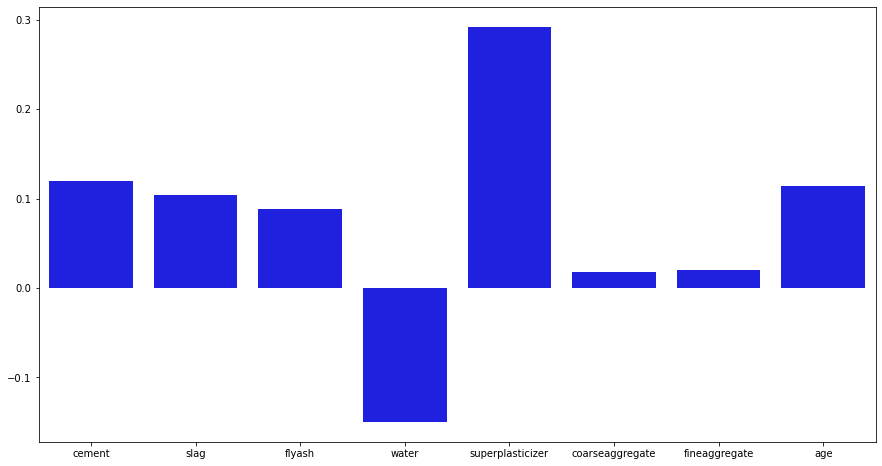

In [10]:
x, y = originalDF.iloc[:,:8], originalDF.iloc[:,8:9]
firstLinearModel = LinearRegression()
firstLinearModel.fit(x, y)
plt.figure(figsize = (15,8))
sns.barplot(originalDF.columns[:-1], firstLinearModel.coef_[0], color='blue')
plt.show()

Podemos observar como el peso más importante de las diferentes variables lo tiene el superplasticizer, un aditivo químico que se le echa a la mezcla para que el agua introducida adquiera una textura mucho más viscosa y el resultado final tenga más resistencia.

La gran mayoría de los otros materiales tienen un peso más estabilizado entre ellos que oscila en el 0.1, menos las dos adiciones, tanto la fina como la gruesa, que apenas superando el 0.0. Dónde si vemos otra punta en este caso negativa es en el agua. Esto nos indica que a mayores cantidades de esta substancia en la mezcla menor será la fuerza compresiva del cemento.

De momento, esto nos da unas correlaciones aceptables fuera de ningún dato excepcional o a simple vista erróneo.

Como ya se ha expuesto antes, estos datos no están normalizados, simplemente estamos explorando el dataset asignado. Para hacer los graficos de dispersion de datos ya hemos normalizado las variables para que tengan unos valores similares entre ellas y no tener una dispersión muy alta entre los distintos elementos que componen la mezcla.

LinearRegression()

<Figure size 1080x576 with 0 Axes>

C:\Users\USUARIO\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


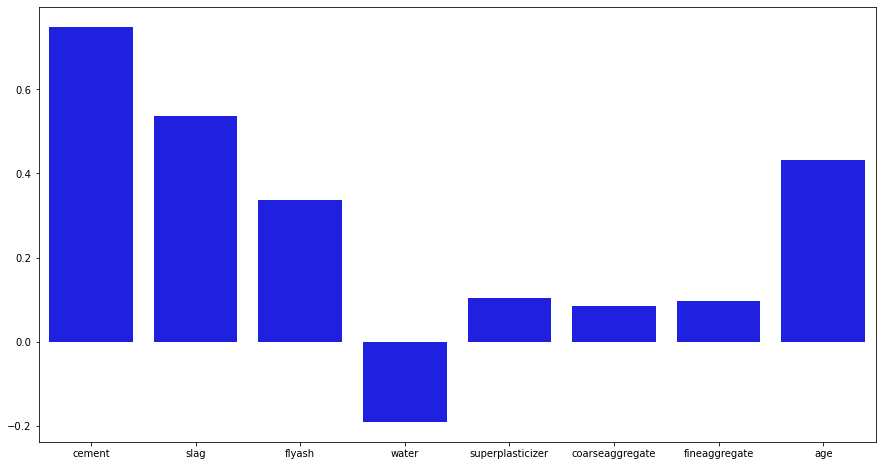

In [11]:
stdX, stdY = stdDF.iloc[:,:8], stdDF.iloc[:,8:9]
firstLinearModel = LinearRegression()
firstLinearModel.fit(stdX, stdY)
plt.figure(figsize = (15,8))
sns.barplot(stdDF.columns[:-1], firstLinearModel.coef_[0], color='blue')
plt.show()

Estos son los resultados obtenidos después de normalizar el dataset completo y comprobar de nuevo las correlaciones y los pesos de los distintos materiales con la mezcla final. Vemos un cambio muy brusco comparándolo con el gráfico anterior.

Vemos como el cemento, el slag, el flyash y el age han visto crecer sensiblemente sus respectivos pesos. Teniendo en cuenta la primera gráfica de correlación con su mapa de calor podíamos pensar que menos el cemento, estos 3 componentes no tenían mucho que aportar al resultado final del compuesto pero hemos acabado viendo como con todos los valores normalizados esto cambia en gran medida. Ahora tenemos 4 valores positivos que sobrepasan el 0.3 del valor los cuales nos describen los materiales que aportan una relación positiva a su cantidad en la mezcla con la fuerza final del cemento.

El agua se mantiene igual, un recurso que responde negativamente a la fuerza del producto final, mientras que los dos agregados (grueso y fino) se mantienen en sus valores anteriores.

Todo el contrario al superplasticizer. Esta mezcla química que despuntaba en el gráfico previo ahora ha visto mermada su importancia en el resultado final a un nivel similar a los de los agregados. A este tipo de cambios nos referíamos cuando dijimos previamente que no había que cerrar la posibilidad a probar modelos que no incorporen reglas dependientes de los primeros resultados de la exploración de los datos.

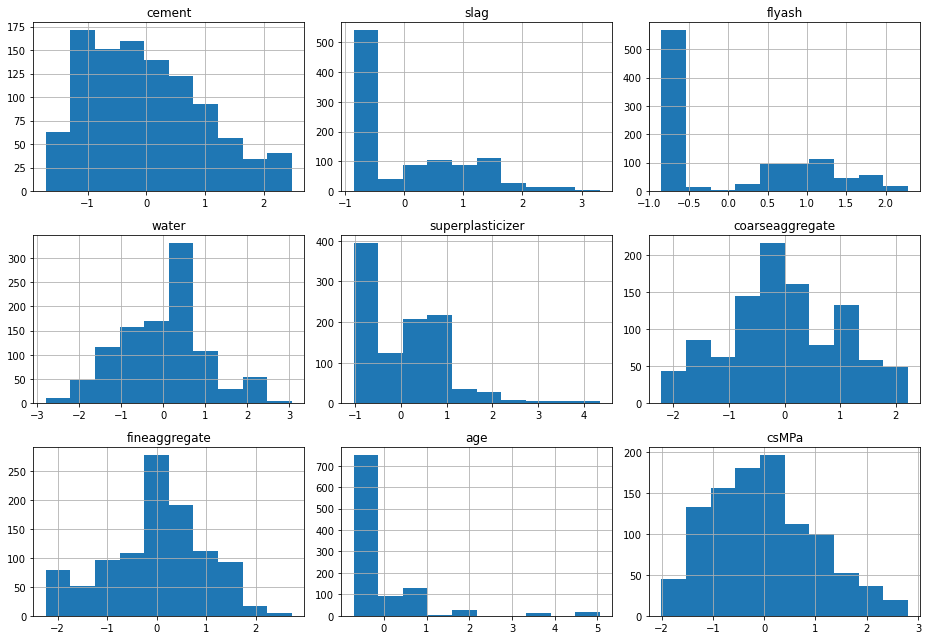

In [12]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(stdDF.columns[varIdx])
        stdDF[stdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

Como habíamos comentado justo antes, observamos el problema de algunas variables que acumulan una gran cantidad de registros en el inicio de sus histogramas. Intentaremos atacar este problema de distintas maneras en el siguiente apartado para ver en que manera afecta al rendimiento de los modelos y si estos mejoran al modificar estos datos para paliar el problema.  
Sin embargo, creemos que si ignoráramos estas acumulaciones de registros que se visualizan al principio de los histogramas, no resultarían unas malas distribuciones.

## 2. Regresiones Lineales (B)

En este apartado pretendemos generar distintos modelos de regresión lineal que podamos comparar. La intención del experimento es ir realizando diferentes cambios en los datos que usaremos para entrenar los modelos con el objetivo de encontrar cuál es el mejor tratamiento de los datos para realizar una regresión lineal que predizca lo mejor posible la variable objetivo de nuestro dataset.  
Por lo tanto, para cada modelo que generemos y entrenemos con los datos de 'train', veremos que MSE obtiene en los datos de 'test' y usaremos esa medida para comparar los distintos modelos (a menor MSE, mejor).  
  
  Por lo tanto, el primer paso será generar estos datos de 'test' y 'train' ayudándonos de la librería sklearn.

In [13]:
from sklearn.model_selection import train_test_split
testSize = 0.2

Esta celda es especialmente importante ya no por la primera línea que simeplemente importa lo necesario para separar os datos en 'train' y 'test' sino por la segunda, que define el % del tamaño total de los datos que usaremos como 'test'.

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(stdDF.iloc[:,:8], stdDF.iloc[:,8:9], test_size=testSize, random_state=0)
xAll, yAll = stdDF.iloc[:,:8], stdDF.iloc[:,8:9]

Ahora ya tenemos los datos separados y listos para entrenar y probar los modelos.  
El valor de 'random_state' lo hemos fijado en 0 para que nuestros resultados puedas ser reproducibles facilmente. Esto es así ya que la función 'train_test_split' hace un 'shuffle' de los datos.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
def getModelMSE(linearRegModel, xTestData, yTestData):
    predictedValues = linearRegModel.predict(xTestData)
    return np.square(predictedValues - yTestData).mean()

def plotModel(linearRegModel, xTest, yTest, xAll, yAll):
    testDataPredictions = linearRegModel.predict(xTest)
    allDataPredictions = linearRegModel.predict(xAll)
    testMSE = getModelMSE(linearRegModel, xTest, yTest)
    allMSE = getModelMSE(linearRegModel, xAll, yAll)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

    ax1.scatter(testDataPredictions, yTest, s=10)
    ax1.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'k--', lw=2)
    ax1.set_title(f"Valores de test \n MSE: {np.round(testMSE,3)}")
    ax1.set_xlabel("Predicciones")
    ax1.set_ylabel("Valores reales")

    ax2.scatter(allDataPredictions, yAll, s=10)
    ax2.plot([yAll.min(), yAll.max()], [yAll.min(), yAll.max()], 'k--', lw=2)
    ax2.set_title(f"Todos los valores \n MSE: {np.round(allMSE,3)}")
    ax2.set_xlabel("Predicciones")
    ax2.set_ylabel(f"Valores reales")

    ax1.axis('square')
    ax2.axis('square')
    plt.tight_layout()
    plt.show()

Estas son funciones que nos ayudarán a dar un valor a los modelos entrenados (MSE, a menor, mejor) así como a visualizarlos.

### - Un modelo con cada atributo

Nuestra intención es obtener el mejor modelo posible y para ello seguramente sea mejor entrenar un modelo que se base en múltiples variables para predecir la variable objetivo que no entrenar un modelo que se base en una únicamente. De todas formas, la práctica lo pide y siempre es un primer paso así que vamos a comparar los distintos modelos que obtenemos si usamos únicamente una variable como 'input' para predecir 'csMpa':

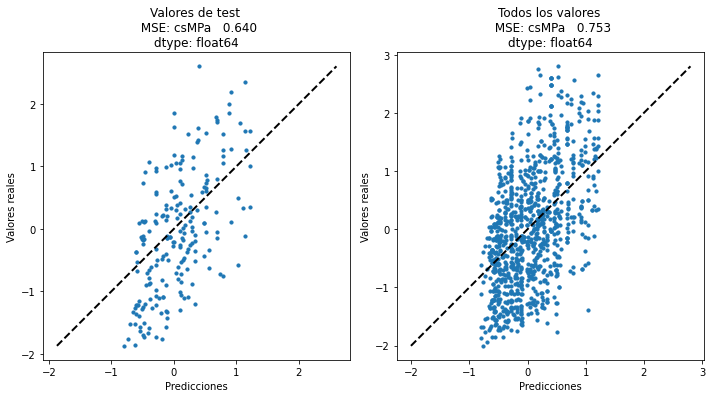

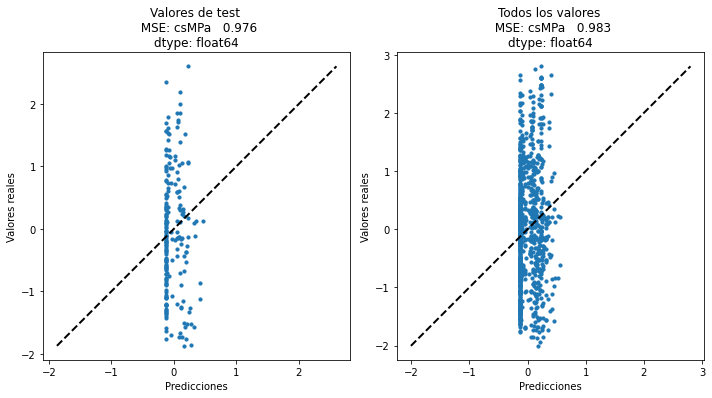

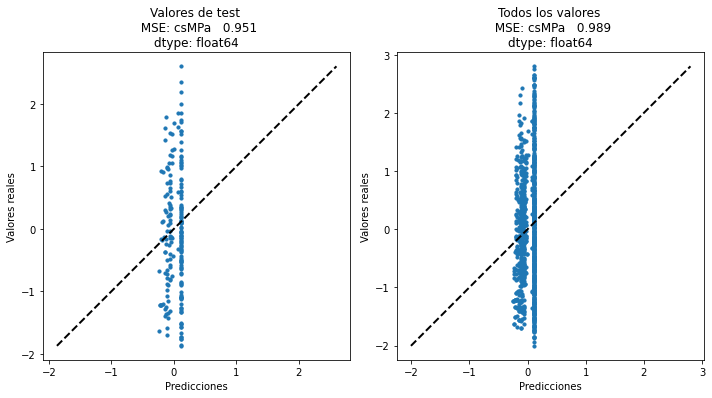

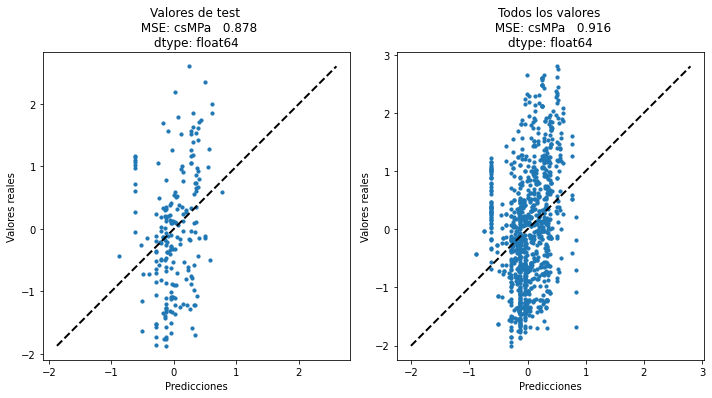

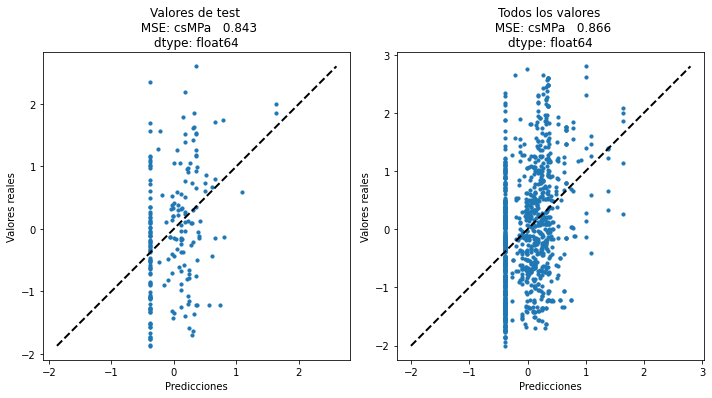

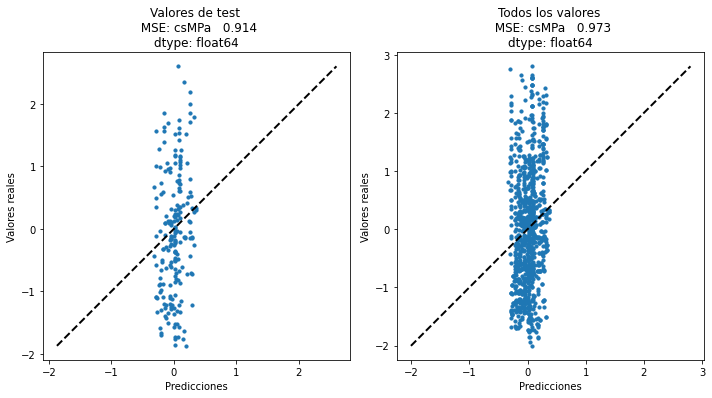

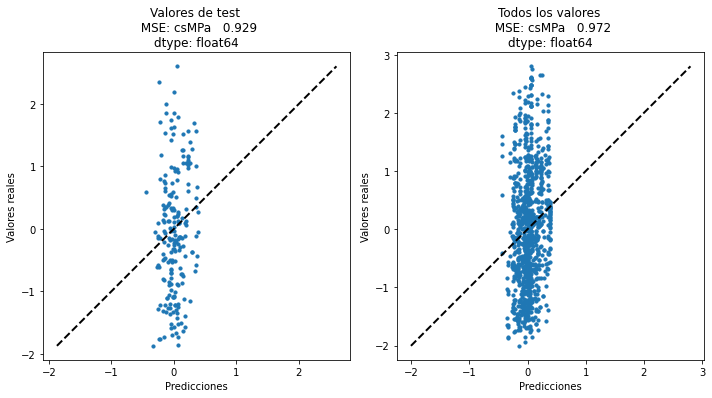

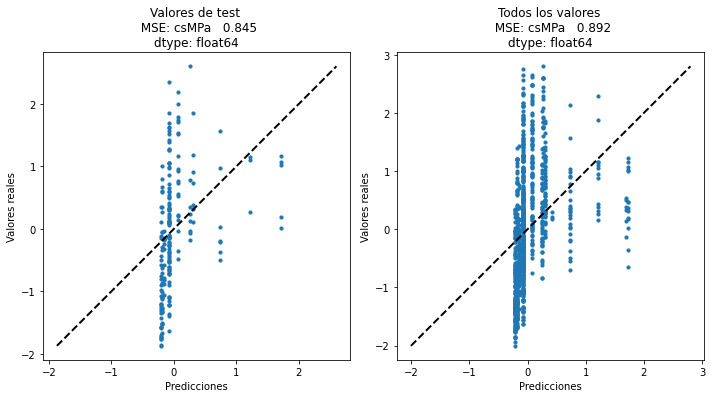

In [17]:
mses = []
plots = []
for varName in xTrain.columns:
    current_xTrain = xTrain[varName].values.reshape(-1,1)
    current_yTrain = yTrain
    current_xTest = xTest[varName].values.reshape(-1,1)
    current_yTest = yTest
    model = LinearRegression().fit(current_xTrain, current_yTrain)
    mses.append(getModelMSE(model, current_xTest, current_yTest))
    plotModel(model, current_xTest, yTest, xAll[varName].values.reshape(-1,1), yAll);

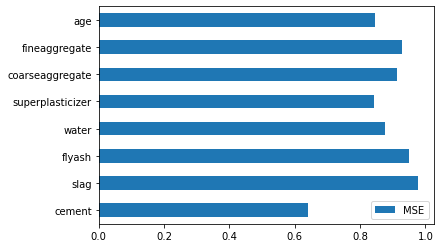

In [18]:
mses = pd.DataFrame(np.asarray(mses), index=xTrain.columns.to_list(), columns=['MSE'])
mses.plot.barh();

Como era de esperar ninguno de los modelos es 'nada del otro mundo', el mejor de ellos es el que usa 'cement' para predecir 'csMPa', que obtiene un MSE alrededor del 0.6. Era de esperar ya que como hemos visto antes esta es la variable que más correlacionada estaba con la objetivo con un valor 0.5.  
Ahora vayamos a por modelos multivariables para intentar mejorar al máximo nuestra predicción.

### - Modelo base (Alias: 0)

Primeramente nos interesa cerar un modelo como 'baseline', este modelo lo crearemos sin aplicar ninguna modificación ni transformación en los datos de tal manera que nos sirva como referéncia para ver si los próximos modelos empeoran o mejora y cuanto empeoran o cuanto mejoran respecto a este primero.

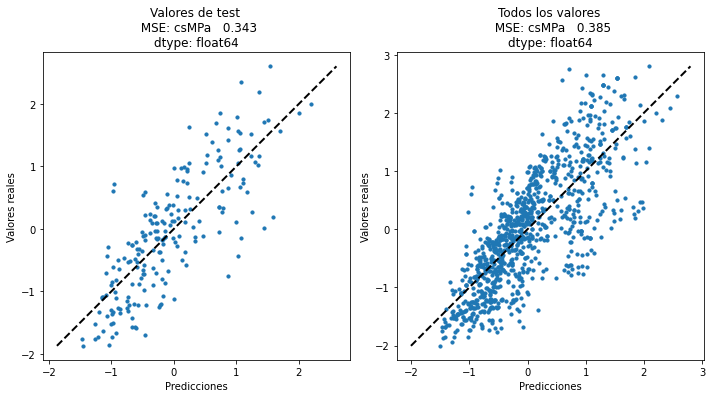

In [19]:
baseModel = LinearRegression().fit(xTrain, yTrain)
plotModel(baseModel, xTest, yTest, xAll, yAll)

### - Modelo con PCA (Alias: 1)

Este modelo no será muy diferente del modelo 1. Lo que haremos será elegir unas cuantas variables (en vez de todas) para entrenar el modelo y ver si obtenemos alguna mejora respecto al modelo 1.  
(SIGUE)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stdDF.iloc[:,:8])

PCAxTrain = principalComponents[:xTrain.shape[0], :]
PCAxTest = principalComponents[xTrain.shape[0]:, :]

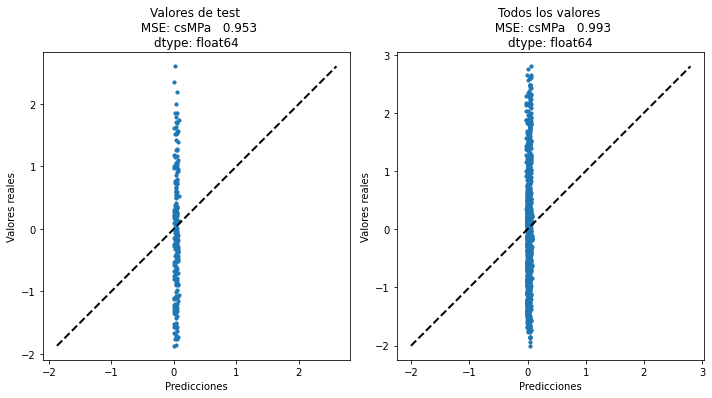

In [21]:
pcaModel = LinearRegression().fit(PCAxTrain, yTrain)
plotModel(pcaModel, PCAxTest, yTest, principalComponents, yAll)

Por alguna razón no hemos obtenido para nada buenos resultados, el modelo está concentrando todas las predicciones en valores muy cercanos al 0. No descartamos que podamos haber cometido algún error en la programación, pero revisando el código múltiples veces no parece ser el caso. Quizás el hecho de tener los datos tan desbalanceados en algunas de las variables ha afectado negativamente al PCA.

### - Modelo sólo con variables de distrbución normal (Alias: 2)

Anteriormente habíamos detectado que algunas variables ('slag', 'flyash', 'superplasticizer', 'age') tenían unas distribuciones nada adecuadas para la regresión lineal. Esta vez vamos a elegir 'a mano' las variables que utilizaremos para entrenar el modelo. Estas serán 'cement', 'water', 'fineaggregate' y 'coarseaggregate' ya que sguína unas buenas distribuciones en sus histogramas esperamos que sean buenas variables con las que entranar al modelo.

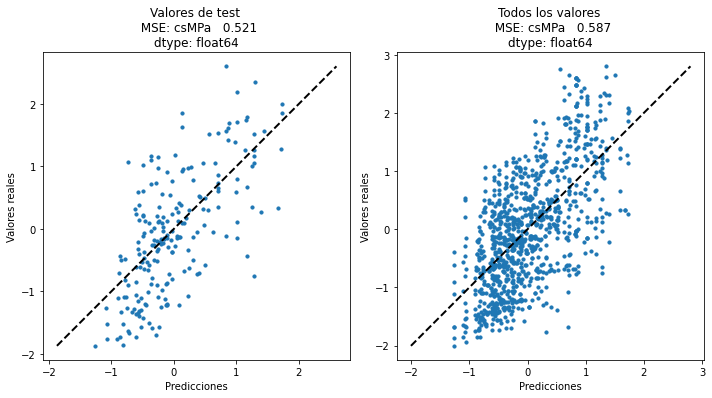

In [22]:
normModelxTrain = xTrain[['cement', 'water', 'fineaggregate', 'coarseaggregate']] 
normModelxTest = xTest[['cement', 'water', 'fineaggregate', 'coarseaggregate']] 

normModel = LinearRegression().fit(normModelxTrain, yTrain)
plotModel(normModel, normModelxTest, yTest, xAll[['cement', 'water', 'fineaggregate', 'coarseaggregate']], yAll)

Si bien el modelo no es desastroso, no alcanza el nivel del modelo 0, probablemente aunque las variables que hemos escogido sigan distribuciones buenas, no tengan la suficiente correlación como para conseguir un modelo lo suficientemente preciso. Al fin y al cabo estamos prescindiendo de variables como 'superplasticizer' o 'age' que mostraban una alta correlación en comparación al resto.

### - Modelos con tranformaciones de datos (Alias: 3-X)

Tras documentarnos, hemos encontrado que una de los métodos más usados que existen para mejorar datos que adolecen de problemas como los grandes desbalanceos en la distribución que tienen algunas de nuestras varibles es aplicando transformaciones a estos.  

Por lo tanto realizaremos un seguido de pruebas en este apartado con distintas tranformaciones para así intentar encontrar un tratamiento de los datos que mejore al máximo el rendimiento del modelo de regresión lineal.  

Para realizar las tranformaciones, debemos situarnos en los datos originales (antes de estandarizarlos), por lo tanto, antes del entrenamiento de los modelos haremos la transformacion de los datos originales y la estandarización que ya habíamos realizado anteriormente.

#### 1. Modelo con transformación SQRT (Alias: 3-1)

In [23]:
sqrtThenStdDF = np.sqrt(originalDF);
standardScaler = preprocessing.StandardScaler()
sqrtThenStdDF = pd.DataFrame(standardScaler.fit_transform(sqrtThenStdDF))
sqrtThenStdDF.columns = originalDF.columns

Ahora veamos que distribución de las variables nos deja esta transformación:

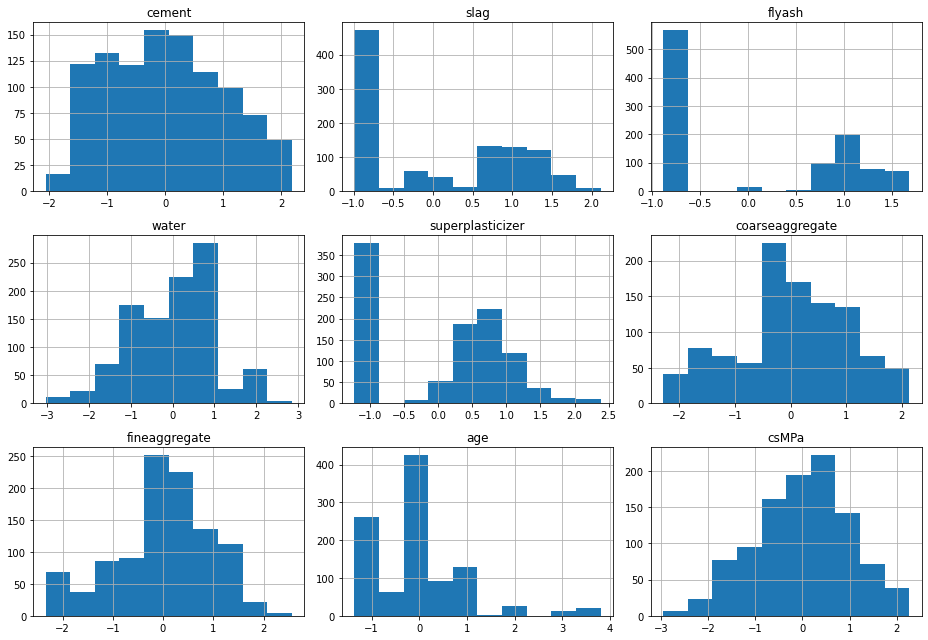

In [24]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(sqrtThenStdDF.columns[varIdx])
        sqrtThenStdDF[sqrtThenStdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

In [25]:
nTrain = xTrain.shape[0]
nTest = xTest.shape[0]

xTrainTransform = sqrtThenStdDF.iloc[:nTrain, :8]
yTrainTransform = sqrtThenStdDF.iloc[:nTrain, 8:9]
xTestTransform = sqrtThenStdDF.iloc[nTrain:, :8]
yTestTranform = sqrtThenStdDF.iloc[nTrain:, 8:9]

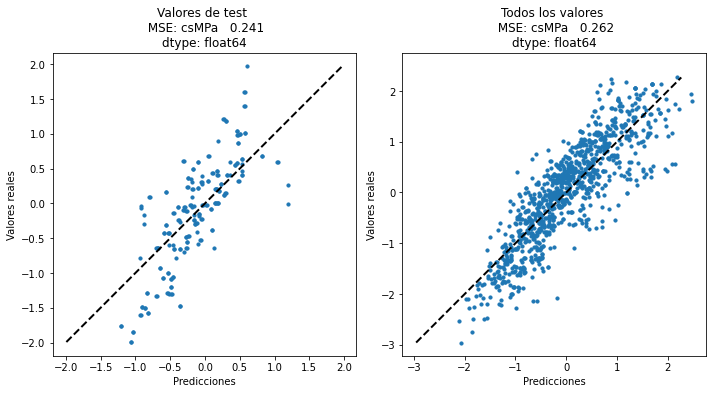

In [26]:
model3_1 = LinearRegression().fit(xTrainTransform, yTrainTransform)
plotModel(model3_1, xTestTransform, yTestTranform, sqrtThenStdDF.iloc[:, :8], sqrtThenStdDF.iloc[:, 8:9])

#### 2. Modelo con transformación SQUARE (Alias: 3-2)

In [27]:
squareThenStdDF = np.square(originalDF);
standardScaler = preprocessing.StandardScaler()
squareThenStdDF = pd.DataFrame(standardScaler.fit_transform(squareThenStdDF))
squareThenStdDF.columns = originalDF.columns

Ahora veamos que distribución de las variables nos deja esta transformación:

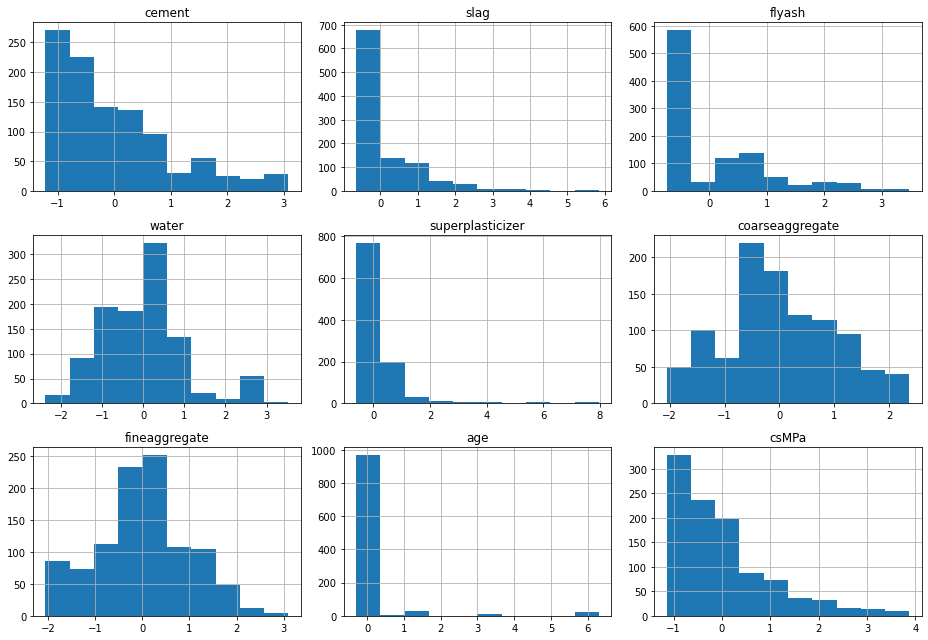

In [28]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(squareThenStdDF.columns[varIdx])
        squareThenStdDF[squareThenStdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

In [29]:
nTrain = xTrain.shape[0]
nTest = xTest.shape[0]

xTrainTransform = squareThenStdDF.iloc[:nTrain, :8]
yTrainTransform = squareThenStdDF.iloc[:nTrain, 8:9]
xTestTransform = squareThenStdDF.iloc[nTrain:, :8]
yTestTranform = squareThenStdDF.iloc[nTrain:, 8:9]

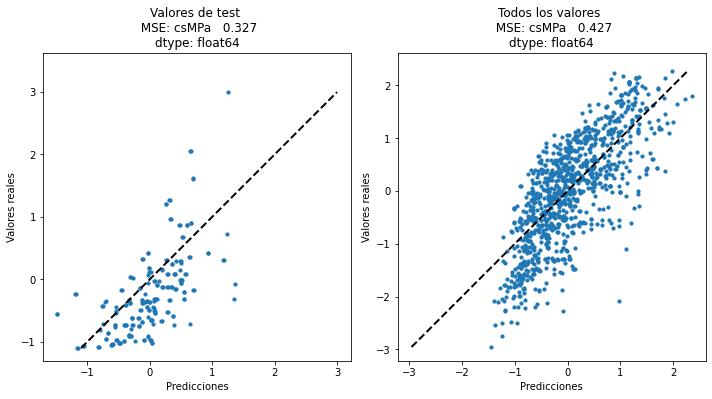

In [30]:
model3_2 = LinearRegression().fit(xTrainTransform, yTrainTransform)
plotModel(model3_2, xTestTransform, yTestTranform, sqrtThenStdDF.iloc[:, :8], sqrtThenStdDF.iloc[:, 8:9])

#### 3. Modelo con transformación CBRT (Alias: 3-3)

In [31]:
cbrtThenStdDF = np.cbrt(originalDF);
standardScaler = preprocessing.StandardScaler()
cbrtThenStdDF = pd.DataFrame(standardScaler.fit_transform(cbrtThenStdDF))
cbrtThenStdDF.columns = originalDF.columns

Ahora veamos que distribución de las variables nos deja esta transformación:

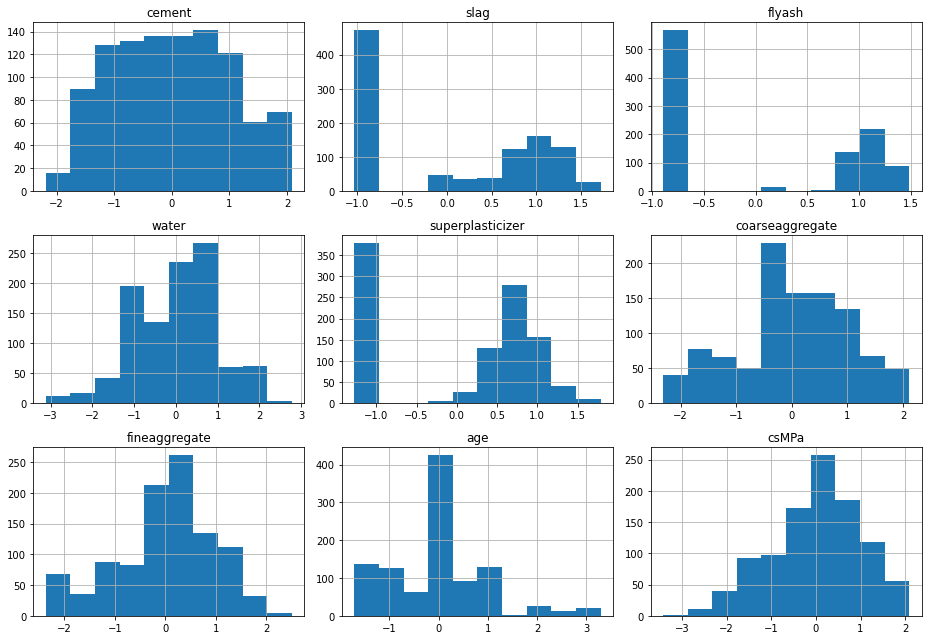

In [32]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(cbrtThenStdDF.columns[varIdx])
        cbrtThenStdDF[cbrtThenStdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

In [33]:
nTrain = xTrain.shape[0]
nTest = xTest.shape[0]

xTrainTransform = cbrtThenStdDF.iloc[:nTrain, :8]
yTrainTransform = cbrtThenStdDF.iloc[:nTrain, 8:9]
xTestTransform = cbrtThenStdDF.iloc[nTrain:, :8]
yTestTranform = cbrtThenStdDF.iloc[nTrain:, 8:9]

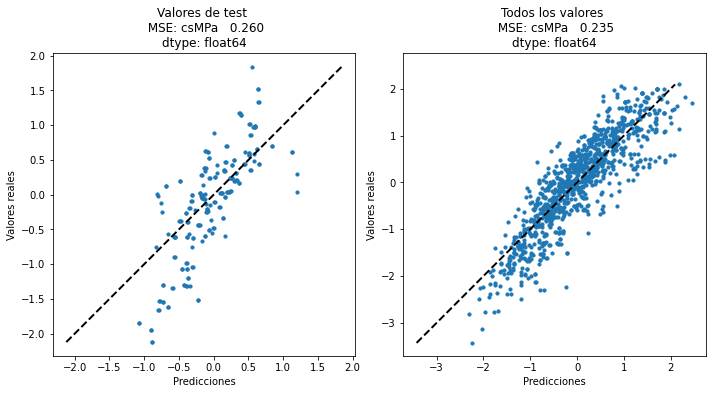

In [34]:
model3_3 = LinearRegression().fit(xTrainTransform, yTrainTransform)
plotModel(model3_3, xTestTransform, yTestTranform, cbrtThenStdDF.iloc[:, :8], cbrtThenStdDF.iloc[:, 8:9])

#### 4. Modelo con transformación LOG (Alias: 3-4)

In [35]:
logThenStdDF = np.square(originalDF);
standardScaler = preprocessing.StandardScaler()
logThenStdDF = pd.DataFrame(standardScaler.fit_transform(logThenStdDF))
logThenStdDF.columns = originalDF.columns

Ahora veamos que distribución de las variables nos deja esta transformación:

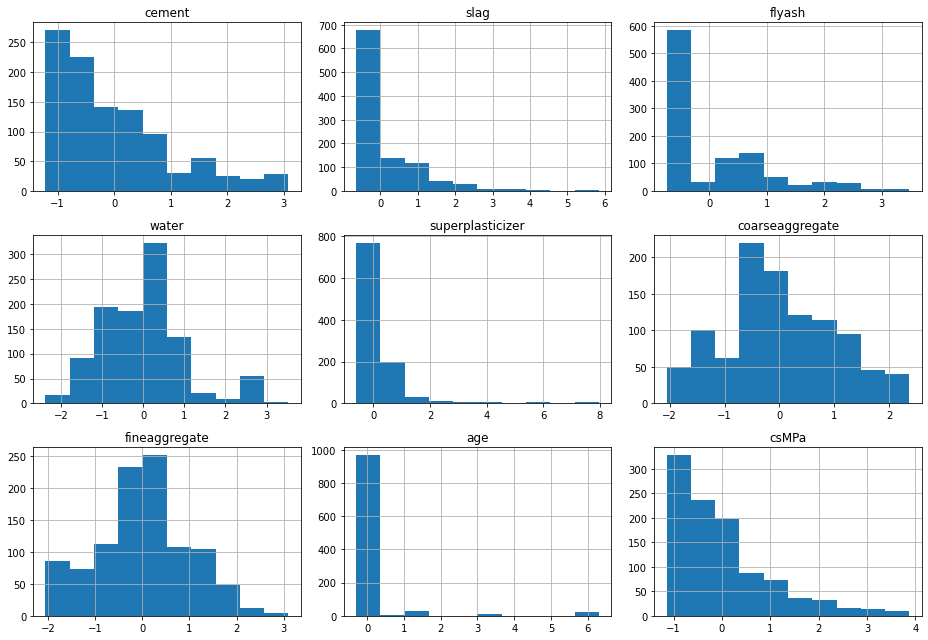

In [36]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(logThenStdDF.columns[varIdx])
        logThenStdDF[logThenStdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

In [37]:
nTrain = xTrain.shape[0]
nTest = xTest.shape[0]

xTrainTransform = logThenStdDF.iloc[:nTrain, :8]
yTrainTransform = logThenStdDF.iloc[:nTrain, 8:9]
xTestTransform = logThenStdDF.iloc[nTrain:, :8]
yTestTranform = logThenStdDF.iloc[nTrain:, 8:9]

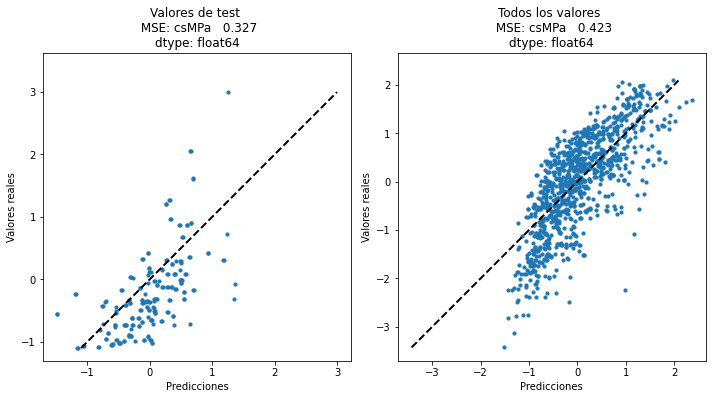

In [38]:
model3_4 = LinearRegression().fit(xTrainTransform, yTrainTransform)
plotModel(model3_4, xTestTransform, yTestTranform, cbrtThenStdDF.iloc[:, :8], cbrtThenStdDF.iloc[:, 8:9])

### 5. Modelo con transformación CBRT + selección arbitrária de datos (Alias: 3-5)

In [39]:
cbrtThenStdDF2 = np.cbrt(originalDF);
standardScaler = preprocessing.StandardScaler()
cbrtThenStdDF2 = pd.DataFrame(standardScaler.fit_transform(cbrtThenStdDF2))
cbrtThenStdDF2.columns = originalDF.columns

cbrtThenStdDF2.drop(["superplasticizer","coarseaggregate","fineaggregate"], axis=1, inplace=True)


Ahora veamos que distribución de las variables nos deja esta transformación:

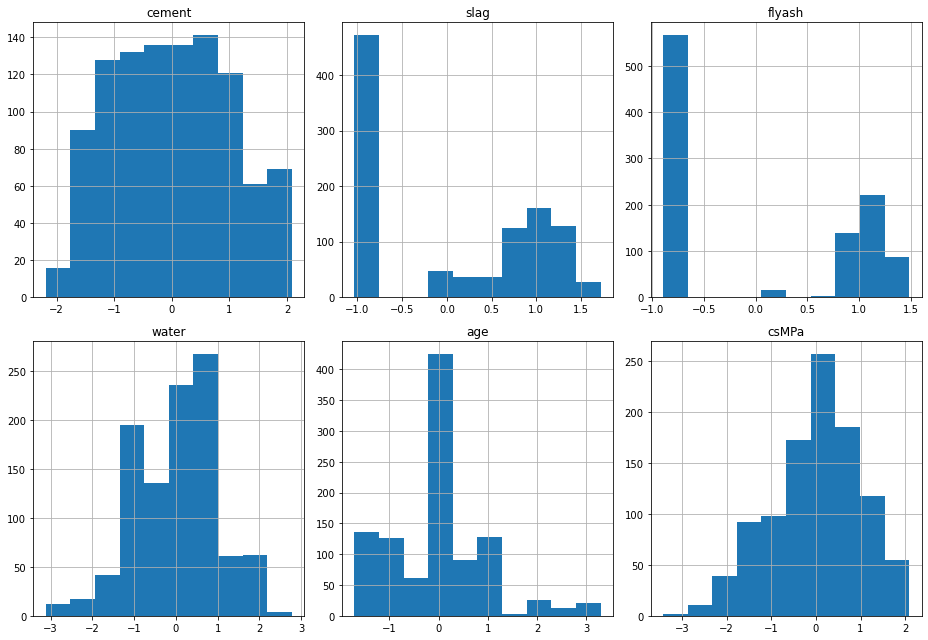

In [40]:
fig, axs = plt.subplots(2, 3)
varIdx = 0
for x in range(2):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(cbrtThenStdDF2.columns[varIdx])
        cbrtThenStdDF2[cbrtThenStdDF2.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

In [41]:
xTrainTransform = cbrtThenStdDF2.iloc[:nTrain, :5]
yTrainTransform = cbrtThenStdDF2.iloc[:nTrain, 5:6]
xTestTransform = cbrtThenStdDF2.iloc[nTrain:, :5]
yTestTranform = cbrtThenStdDF2.iloc[nTrain:, 5:6]

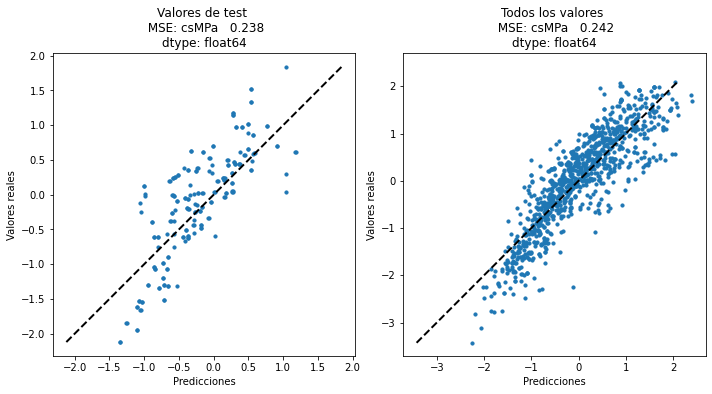

In [42]:
model3_5 = LinearRegression().fit(xTrainTransform, yTrainTransform)
plotModel(model3_5, xTestTransform, yTestTranform, cbrtThenStdDF2.iloc[:, :5], cbrtThenStdDF2.iloc[:, 5:6])

## 3. Descenso de gradiente (A)

In [43]:
class Regressor(object):
    def __init__(self, alpha, x_values, y_values):
        #Creamos un array con todos los pesos
        self.w = np.zeros(x_values.shape[1])
        
        self.alpha = alpha
        
        self.y_values = y_values
        self.x_values = x_values 
        
    
    def train(self, max_iter):
        # Entrenar durant max_iter iteracions
        m = len(self.y_values)
        cost_history = [0] * max_iter
        for it in range(max_iter):
            predict = self.x_values.dot(self.w) #calculem la prediccio
            loss = predict - self.y_values #calculem la perduda
            gradient = self.x_values.T.dot(loss) / m #calculem el gradient
            self.w = self.w - self.alpha * gradient #actualitzem els pesos
            cost = self.cost_function() # #calculem nou cost
            cost_history[it] = cost
           
        
        return self.w, cost_history
    
    def predict(self, x):
        predict = x.dot(self.w)
        return predict
    
    
    def cost_function(self):
        m = len(self.y_values)
        j = np.sum((self.x_values.dot(self.w) - self.y_values) ** 2) / (2 * m)
        return j
    
#calcula el score    
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return r2

Esta clase se encargara de almacenar i actualizar los pesos de cada atributo, mientras que la funcion r2 nos devolverá el score de nuestro modelo.

### Creación del modelo

Ahora simplemente semparamos nuestros datos estandarizados en train y test y creamos nuestro modelo con un learning rate y unas iteraciones arbitrarias e iremos probando hasta conseguir un buen resultado.

In [44]:
sqrtThenStdDF = np.sqrt(originalDF);
standardScaler = preprocessing.StandardScaler()
sqrtThenStdDF = pd.DataFrame(standardScaler.fit_transform(sqrtThenStdDF))
sqrtThenStdDF.columns = originalDF.columns

# separamos los datos en train y test
xTrain, xTest, yTrain, yTest = train_test_split(sqrtThenStdDF.values[:,:8], sqrtThenStdDF.values[:,8], test_size=0.2) 

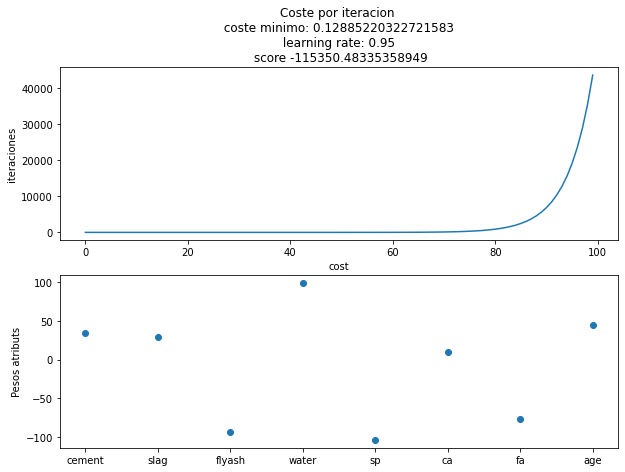

In [45]:
learningrate = 0.95
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100
W,c_history = GD.train(iterations) #entrenamos

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot();

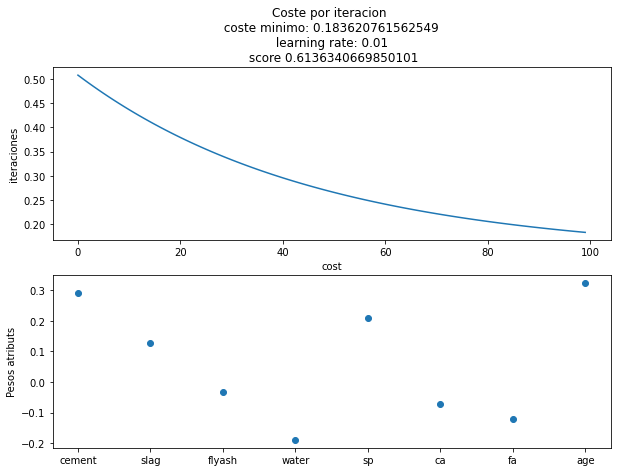

In [46]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot();

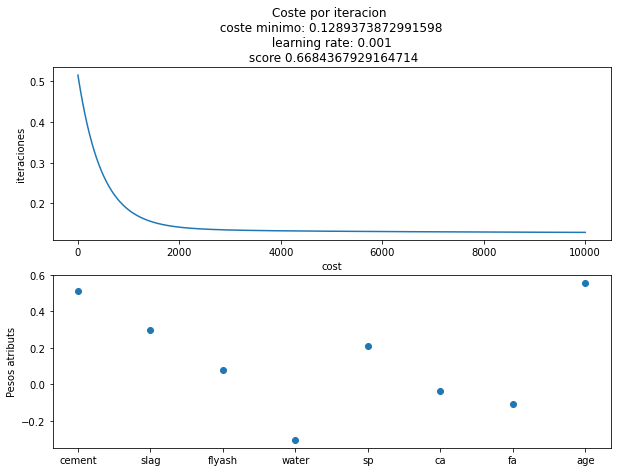

In [47]:
learningrate = 0.001
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 10000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot();

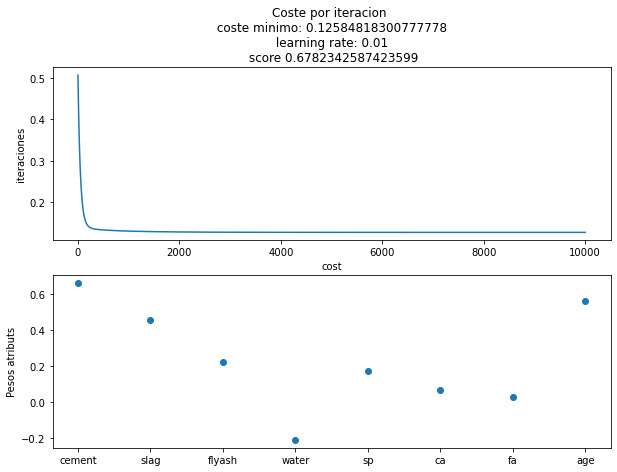

In [48]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 10000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot();

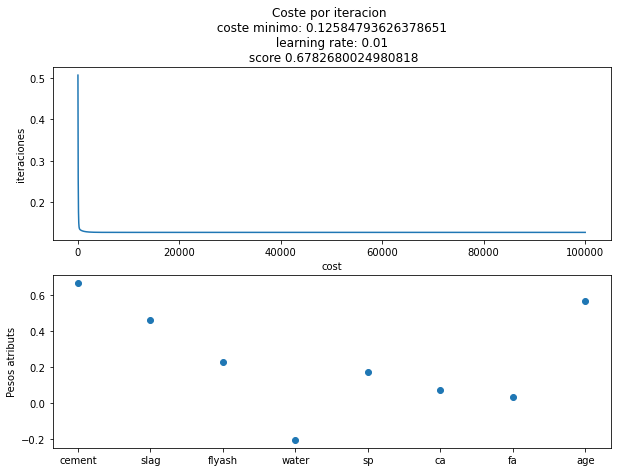

In [49]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot();

Tras estas pruebas concluimos que llegados a cierto punto aumentar el numero de iteraciones no otorga una mejora importante en el modelo. En cuanto el learning rate es importante dar con un buen valor ya que si es demasiado grande el coste empezara a crecer muy pronto y nos saltaremos el mínimo, pero si es demasiado pequeño le costará muchas iteraciones llegar hasta este mismo mínimo.

Tambien vemos  en los como los atributos com mayor importancia són 'age','slag' y 'cement' como ya habiamos visto cuando mirabamos la correlación de los atributos. Destacar que 'water es el único atributo con un peso negativo y el resto tienen un peso cercano a zero.